# L05


Multi-class cross entropy
## Angular soft-max
it helps us in calculating a different kind of loss, it introduces a margin between the target class and the non-target class into the softmax loss. The margin is controlled by a hyper-parameter $m$.  


Let's take a dummy example, a two-class classification:

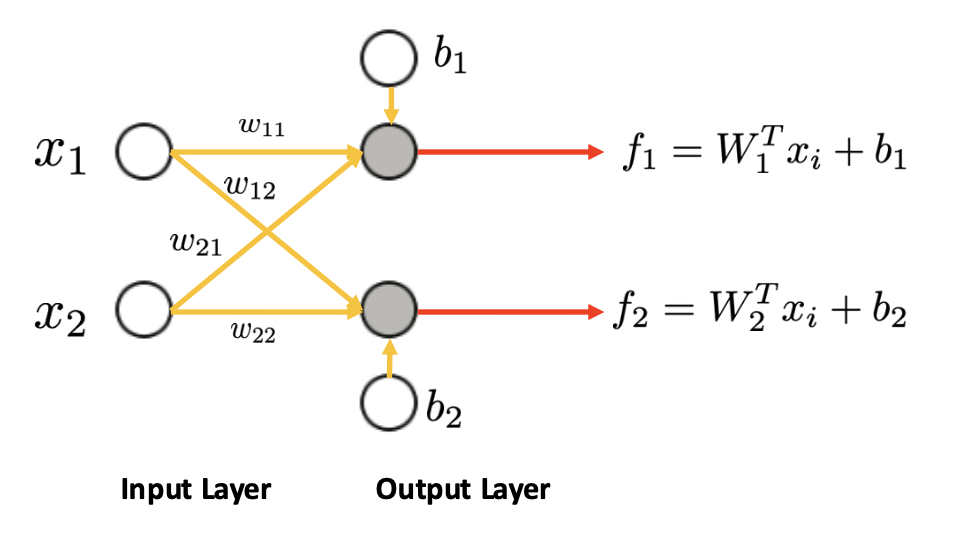

- $W_n^T$ is the weight vector for the $n^{th}$ class
- $x_i$ is the input feature vector
- $b_n$ is the bias term for the $n^{th}$ class

The standard softmax loss (cross-entropy loss) is defined as:
$$L = -\frac{1}{N}\sum_i^N\log{(\frac{e^{W^T_{y_i}x_i + b_{y_i}}}{\sum_j e^{W^T_j x_i  + b_j}})}$$
where $y_i$ is the true class label for the $i^{th}$ sample.  

This loss encourages the model to maximize the probability of the correct class while minimizing the probabilities of incorrect classes. However, it doesn't explicitly enforce a margin between classes in the feature space.  


For our two-class problem, we can express the probabilities as:
$$p1 = \frac{e^{W^T_{1}x_i + b_{1}}}{e^{W^T_{1}x_i + b_{1}} + e^{W^T_{2}x_i + b_{2}}} $$
$$p2 = \frac{e^{W^T_{2}x_i + b_{2}}}{e^{W^T_{1}x_i + b_{1}} + e^{W^T_{2}x_i + b_{2}}} $$


In a $2$ class classification, the predicted label will be assigned to class $2$ if $p_1 \geq p_2$ and class $2$ if $p_i<p_2$.  

The decision boundary occurs where $p_1 = p_2$, or equivalently, where $p_1 - p_2 = 0$ (meaning also $b_1=b_2=0$).
This leads to the decision boundary equation:
$$(W^T_1 - W^T_2)x_i + (b_1 - b_2) = 0$$
This is a linear decision boundary in the feature space. The weights determine the orientation of the boundary, while the biases shift it.  
To have a geometrical interpretation we can rewrite the decision boundary in terms of angles:  
$$||W_1||\cos{(\theta_1)}||x_i|| - ||W_2||\cos{(\theta_2)}||x_i|| + (b_1 - b_2) = 0$$
$$(||W_1||\cos{(\theta_1)} - ||W_2||\cos{(\theta_2)}) * ||x_i|| = 0$$

where $\theta_1$ and $\theta_2$ are the angles between $W_1$ and $x_i$, and $W_2$ and $x_i$ respectively.  
This formulation reveals that the classification decision depends on the cosine similarities between the weight vectors and the input, scaled by their magnitudes.  

A-softmax introduces two key assumptions:

1. $||W_1|| = ||W_2|| = 1$ (normalize weight vectors)
2. $b_1 = b_2 = 0$ (remove bias terms)
   
These assumptions simplify the decision boundary to purely angular terms, focusing on the direction of the weight vectors rather than their magnitude or offset.  
With these assumptions, the decision boundary simplifies to:
$$\cos{\theta_1} - \cos{\theta_2} = 0$$

Now, the classification depends solely on the angles between the input and the weight vectors. This encourages the model to learn features that are more discriminative in terms of direction.

A-softmax introduces an additional parameter $m$ to create a more stringent angular margin:  

$$\cos{(m\theta_1)} - \cos{\theta_2} = 0$$
(for $m \geq 2$)

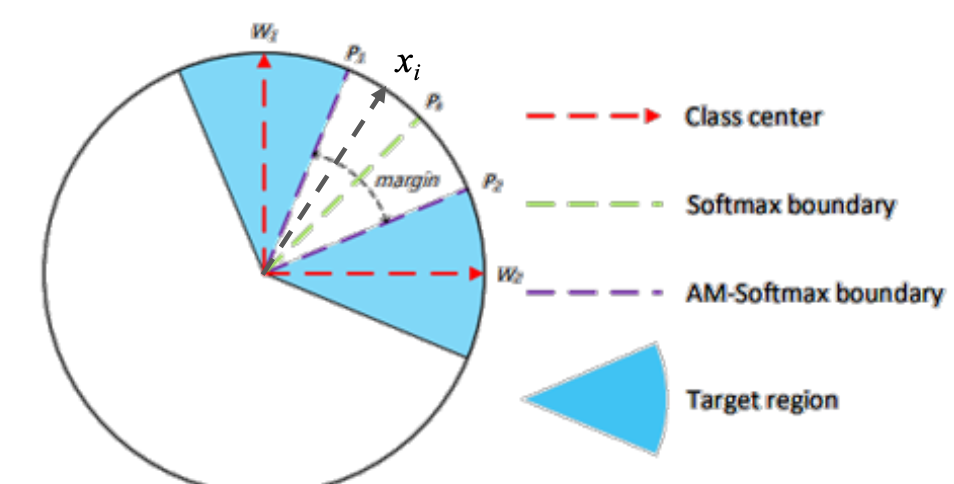

This modification makes the angular margin between classes larger.  
By forcing a larger angular separation, the model learns features that are more robust and discriminative. The parameter $m$ allows for control over the strictness of this angular constraint.  

In practice, A-softmax reformulates the softmax function to directly optimize these angular relationships. This often involves replacing the standard dot product $W^T_ix_i$ with a function that computes $\cos{(m\theta_i)}||x_i||$.  
This reformulation allows the network to directly learn features in a hyperspherical space, potentially leading to more discriminative and generalizable representations.

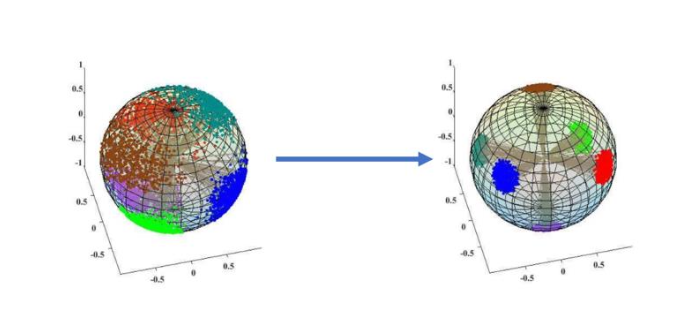

## Angular Softmax variations
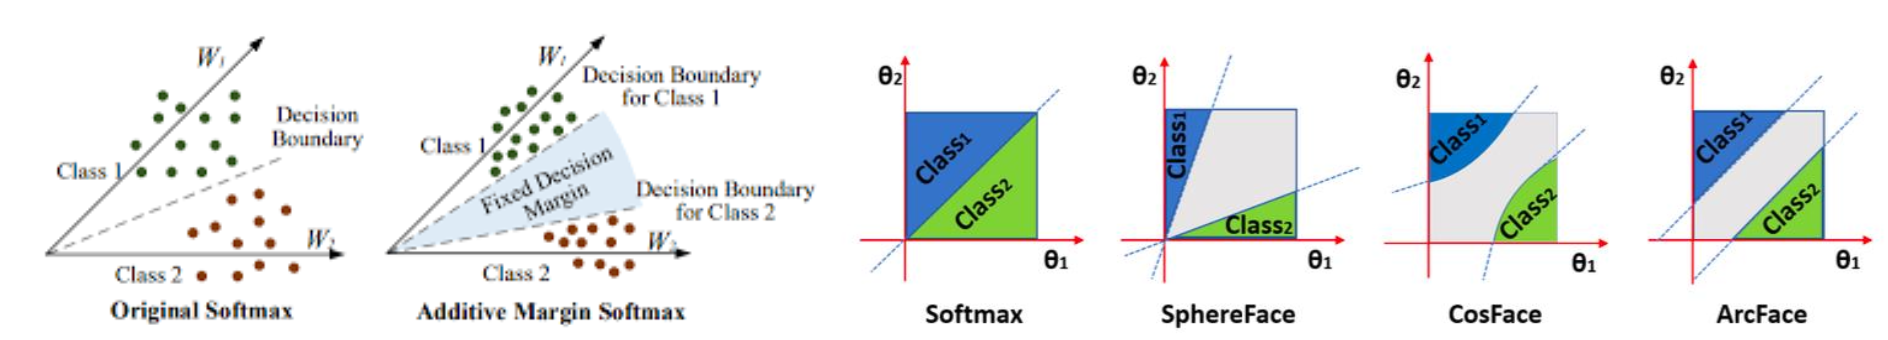

#### Angular Softmax (SphereFace)

$$
L = -\frac{1}{N} \sum_{i=1}^N \log \left( \frac{e^{W_{y_i}^T x_i + b_{y_i}}}{\sum_j e^{W_j^T x_i + b_j}} \right) = -\frac{1}{N} \sum_{i=1}^N \log \left( \frac{e^{\|x_i\| \cos(m \theta_{y_i, i})}}{e^{\|x_i\| \cos(m \theta_{y_i, i})} + \sum_{j \neq i} e^{\|x_i\| \cos(\theta_{j, i})}} \right)
$$

Since the cosine function is monotonically decreasing in $[0, \pi]$, to relax the constraint about $\theta$ ranging in $[0, \pi/m]$, we replace the cosine function with another one that allows for a function monotonically decreasing for all values of the angles.

The new loss function is:

$$
L = -\frac{1}{N} \sum_{i=1}^N \log \left( \frac{e^{\|x_i\| \phi(\theta_{y_i, i})}}{e^{\|x_i\| \phi(\theta_{y_i, i})} + \sum_{j \neq i} e^{\|x_i\| \cos(\theta_{j, i})}} \right)
$$

where

$$
\phi(\theta_{y_i, i}) = (-1)^k \cos(m \theta_{y_i, i}) - 2k \quad k \in [0, m - 1]
$$

#### Additive Margin Softmax (AMSoftmax, CosFace)

The loss function is defined as:

$$
L_i = -\log \left( \frac{e^{W_{y_i}^T x_i + b_{y_i}}}{\sum_j e^{W_j^T x_i + b_j}} \right) = -\log \left( \frac{e^{\|W_{y_i}\| \|x_i\| \cos(\theta_{y_i, i}) + b_{y_i}}}{\sum_j e^{\|W_j\| \|x_i\| \cos(\theta_{j, i}) + b_j}} \right)
$$

where we normalize the weights and features such that $(||W_j\| = 1, \forall j)$ and $(|x_i| = 1, \forall i)$, resulting in:

$$
L_{lmc} = \frac{1}{N} \sum_i -\log \frac{e^{s(\cos(\theta_{y_i, i}) - m)}}{e^{s(\cos(\theta_{y_i, i}) - m)} + \sum_{j \neq y_i} e^{s \cos(\theta_{j, i})}}
$$

#### Additive Angular Margin Softmax (ArcFace)

The loss function is defined as:

$$
L_3 = -\frac{1}{N} \sum_{i=1}^N \log \frac{e^{s(\cos(\theta_{y_i} + m))}}{e^{s(\cos(\theta_{y_i} + m))} + \sum_{j=1, j \neq y_i}^n e^{s \cos(\theta_j)}}
$$


----

### Metrics:
Let's define $W_e$ the embedding of the utterance of speaker $X$  
Let's now suppose the user $X$ wants to test the system, he speaks and his utterance is calculated as being $W_t$  

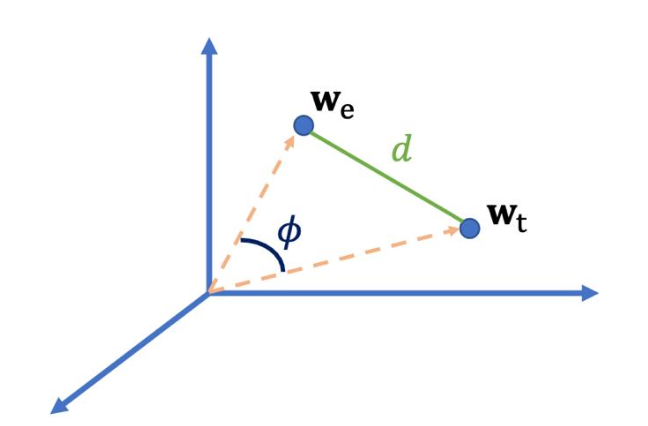  

The metric compares enrollment and test embeddings $W_e$ and $W_t$, thresholding is then applied to decide if in the embedding space these embeddings are close enough.  

There are multiple metrics available:
- Cosine scoring (simplest one):
   $$s = \cos(\phi) = \frac{\mathbf{w}_e^T \mathbf{w}_t}{\|\mathbf{w}_e\|_2 \|\mathbf{w}_t\|_2}$$

- LDA (Linear Discriminant Analysis) it can even be seen as transforming our current embedding space into a new embedding space, projecting them into this new vector space. It does this following two rules:
  - Maximize the separation between classes.
  - Minimizes the covariance within each class.
- PLDA (Probabilistic LDA), it's a probabilisic extension of LDA.

### Calibration
How do we choose the threshold? It depends:

- **High Security:**: Of course we want high precision instead of an high recall, since this is for a verification system. We want high true positive, at the cost of possible more false positives. Precision oriented.
- **Low security** : Recall oriented.

### Evaluation:
Different types of errors:
- Miss/false rejection (**FR**)
  - true speakers classified as impostor
  - Metric: Miss rate $P_{\text{MISS}}$
- False alarm (**FA**)
  - Impostors classified as the true speaker
  - Metric: False alarm rate $P_{\text{FA}}$
  
Different kind of metrics:
- Detection error trade-Off (**DET**)
- Equale Error rate (EER)
- Detection Cost Function (DCF)

----

# Speaker Diarization

Usually used in Video-calls, used for meeting summarization techniques.
Speaker recognition is the “who spoken when” task: given a recording, divide
it into segments, where each segment corresponds to speech of a single
speaker.  
Each recording contains multiple speakers – unlike what we have assumed so
far for speech recognition and speaker verification.  

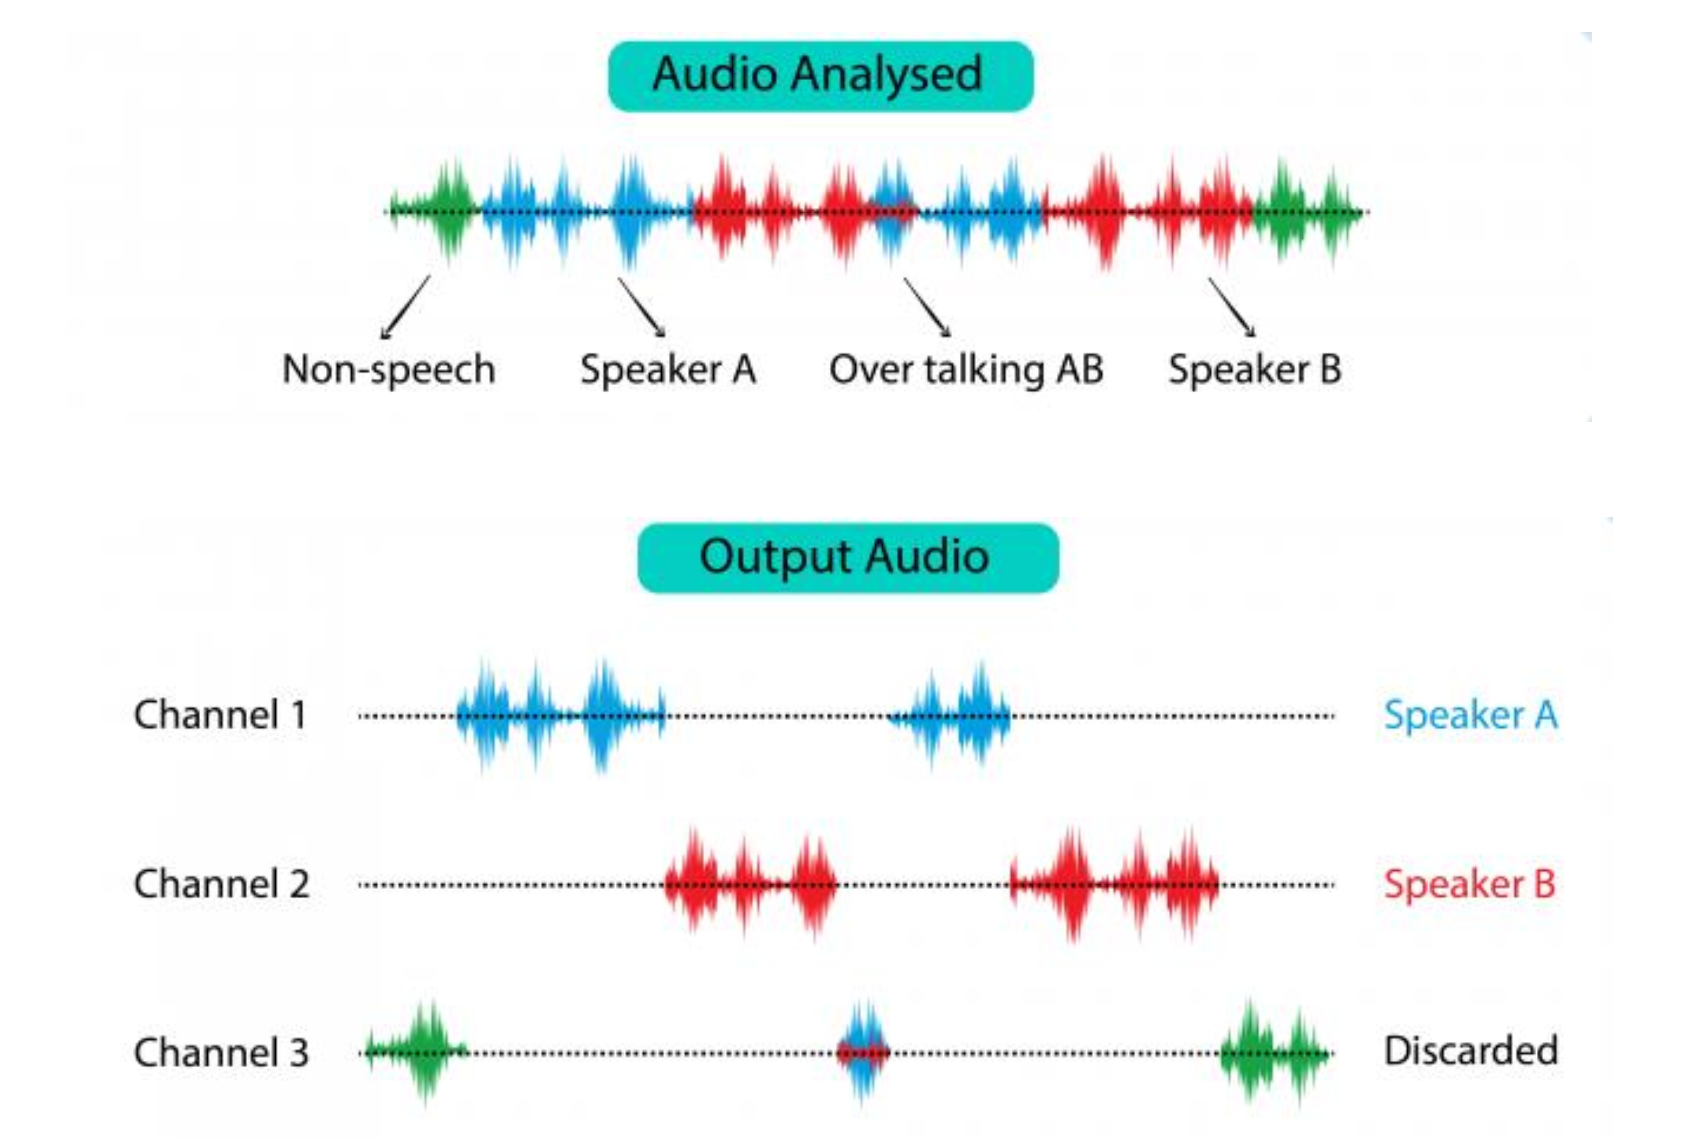

A Basic Approach to Speaker Diarization:  

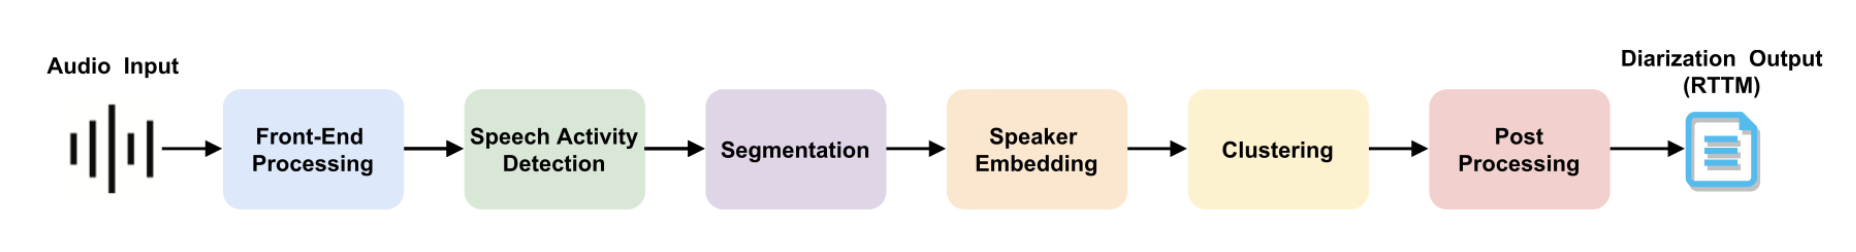

#### 1: Front end processing
is used for speech anhacement, denoising, speech spearation, extraction etc.  
We want an high SNR, we implement low pass filters for example.

#### 2: SAD
also known as voice activity detection (VAD), distinguishes speech from non-speech such as background noise. Since SAD is a pre-processing step that can create errors that propagate through the whole pipeline.

#### 3: Segmentation
Is the activity of partitioning the audio tracks into sub-segments.  
Can be done with 1 total voice or different channels represernting different voices.

#### 4: Speaker Embedding
Involves transforming speech segments into multidimensional vectors, aiming to generate embeddings that exhibit similarity for segments linked to the same speakers.  

This is done with **x-vectors**, based on TDNN (Time Delay Neural Network), which are a middle ground bwteen Transformers and RNNs (interesting, look forward).  
This encoding takes into account time, it looks at frames into the past and into the future, causing an intrinsic delay into the network. Each embedding at each state has a pretty focused "receptive field", we then do a pooling, it's basically a 2D convolution.  
Neural Architecture Search.  

We then basically dropped it in favour of **2D convolutional neural networks**.  The input here it's different from the x-vectors.  
Size is: (B, 1, F, T), with F frequencies and T time (few seconds), it's basically an image (Resnet2D and Res2Net 2D, which is with multi-scale operators, basically inception-net, basically it's pretty usefull here in audio processing because we have a temporal correlation factor, this is a precursor to attention-based networks).  

We then go through Self Attentive Pooling (**SAP**, which is a weighted **GAP**) and Attentive Statistical Pooling (**ASP**, which is a weighted GSP).  
The main idea is that I end up with 2 dimensional encoding.



#### 5: Clustering

We want to cluster our embedding, the number of clusters it derived from the number of speakers I have into my system. Since i don't know a priori, k-means is the virgin, DB-Scan is yet again the fucking Chad King.  
Two kind of Clustering Hierarchical methods:
- Agglomerative methods
  - Start with partition $P_n$ where each object forms its own cluster.
  - Merge the two closest clusters, obtaining $P_{n-1}$.
  - Repeat and merge until only one cluster is left.
- Divisive Methods
  - Start with $P_1$
  - Split the collection into two clusters that are as homogenous (and as different from each other) as possible.
  - Apply splitting procedure recursively to the clusters.  
